# Temperature Modeling using Recurrent Neural Network

In [1]:
import numpy  as np;
import pandas as pd;
import datetime as dt;
import matplotlib.pyplot as plt;
%matplotlib inline
from matplotlib.pylab import rcParams;
rcParams['figure.figsize']=20,6
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.graph_objects as go

# We will work on temperature data of 
## Meghalaya

Loading the data

In [2]:
temp_data_matrix=pd.read_excel('seasonal data.xls', sheet_name='Minimum Temperature');

In [3]:
temp_data_matrix.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1901,10.048,12.167,16.195,20.599,21.546,23.642,24.098,23.871,23.374,21.354,15.916,12.000
1,1902,10.848,12.070,17.217,18.545,21.575,22.868,24.001,23.974,23.349,20.106,15.294,11.397
2,1903,9.776,11.452,15.621,20.599,21.797,22.695,24.505,23.026,23.223,21.671,16.516,12.000
3,1904,10.298,12.347,17.416,19.521,20.826,23.649,23.804,23.627,23.422,20.753,15.820,11.345
4,1905,9.922,9.272,14.692,17.971,21.478,23.417,24.249,23.449,23.723,21.050,16.168,11.897


In [4]:
temp_data_matrix.set_index("Year",inplace=True); #year column set as index
temp_data_matrix=temp_data_matrix.transpose();
print(temp_data_matrix.head())


Year    1901    1902    1903    1904    1905    1906    1907    1908    1909  \
Jan   10.048  10.848   9.776  10.298   9.922  10.122  11.792  10.548  10.422   
Feb   12.167  12.070  11.452  12.347   9.272  11.772  11.316  11.823  12.115   
Mar   16.195  17.217  15.621  17.416  14.692  14.777  14.948  17.016  17.993   
Apr   20.599  18.545  20.599  19.521  17.971  20.367  18.545  21.694  19.044   
May   21.546  21.575  21.797  20.826  21.478  22.276  21.295  21.318  21.740   

Year    1910  ...    1993    1994    1995    1996    1997    1998    1999  \
Jan   10.270  ...   9.850  12.062  10.978  11.389  10.694  10.873  12.292   
Feb   11.793  ...  12.621  12.249  13.076  13.583  11.763  14.365  16.315   
Mar   15.695  ...  15.289  16.895  18.227  17.531  17.518  16.545  17.796   
Apr   17.745  ...  18.847  20.019  21.170  21.677  19.073  22.667  21.647   
May   21.474  ...  19.932  22.507  23.067  21.374  22.122  23.574  21.744   

Year    2000    2001    2002  
Jan   11.190  11.129  11.

In [5]:
dates = pd.date_range(start='1901-01', freq='MS', periods=len(temp_data_matrix.columns)*12)
dates


DatetimeIndex(['1901-01-01', '1901-02-01', '1901-03-01', '1901-04-01',
               '1901-05-01', '1901-06-01', '1901-07-01', '1901-08-01',
               '1901-09-01', '1901-10-01',
               ...
               '2002-03-01', '2002-04-01', '2002-05-01', '2002-06-01',
               '2002-07-01', '2002-08-01', '2002-09-01', '2002-10-01',
               '2002-11-01', '2002-12-01'],
              dtype='datetime64[ns]', length=1224, freq='MS')

## Minimum Tempertaure across all years-monthly

Text(0.5, 1.0, 'Monthly minimum temperature across all years')

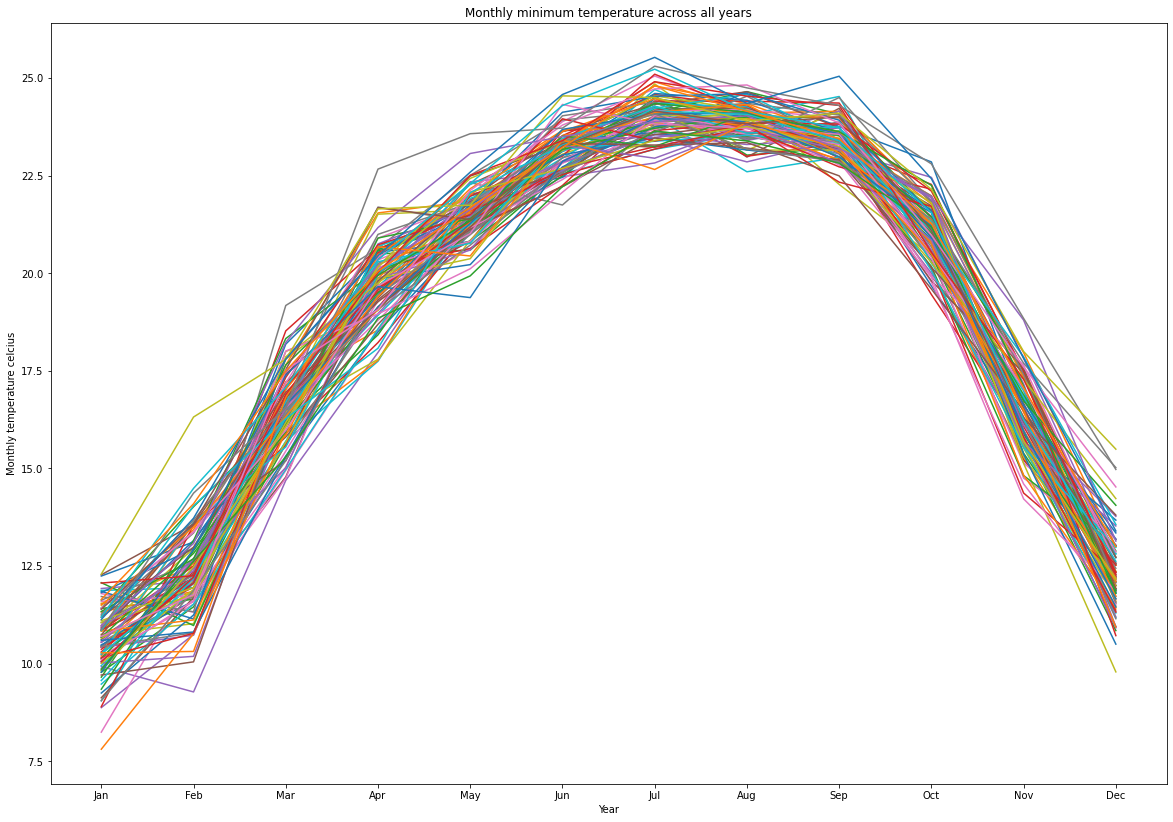

In [6]:
plt.figure(figsize=(20,14))
plt.plot(temp_data_matrix)
plt.xlabel('Year')
plt.ylabel('Monthly temperature celcius')

plt.title('Monthly minimum temperature across all years')


## Box plot for minimum temperature across all years 

In [7]:
temp_data_matrix.transpose().iplot(kind = 'box',title='Box plot for minimum temperature across all years',
    xTitle='Months',
    yTitle='Minimum temperature',)


# Heatmap of minimum tempertaure data

In [8]:
temp_data_matrix.iplot(kind = 'heatmap' , colorscale='Blues',title='Heatmap of minimum tempertaure data',
    xTitle='Months',
    yTitle='Years')

# Hierarchical Clustering

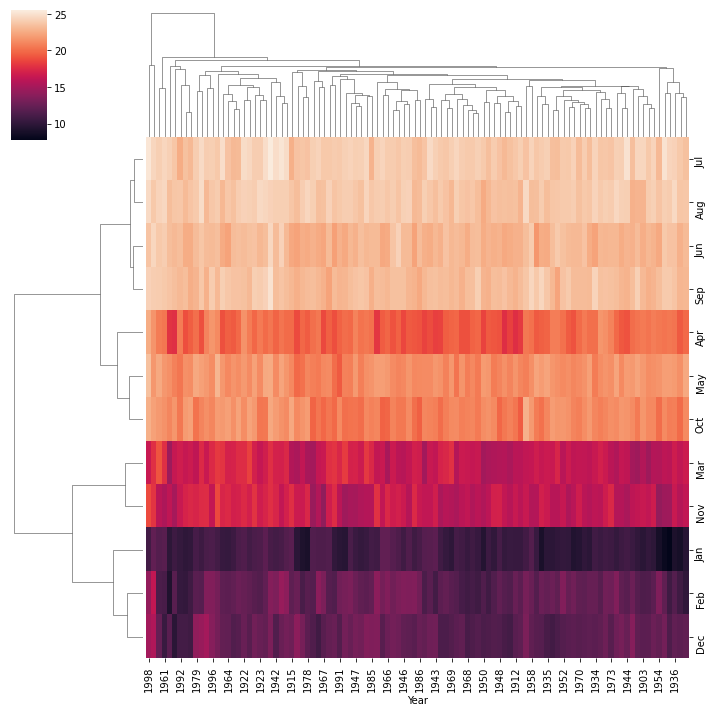

In [9]:
sns.clustermap(temp_data_matrix)

In [10]:
average_temp_year = pd.DataFrame({'average_temp_year': temp_data_matrix.mean(axis=0)})#creating a dataframe from dictonary.
#axis value 0 means operations are performed column wise.
average_temp_year = average_temp_year.transpose()
average_temp_year.head()

Year,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
average_temp_year,18.734167,18.437,18.573417,18.569,18.107333,18.62625,18.44,18.8095,18.962167,18.154583,...,18.380667,19.251833,19.585167,19.3325,19.288,20.225667,20.206083,19.434,19.902583,19.32775


Text(0.5, 1.0, 'Monthly minimum temperature across all years')

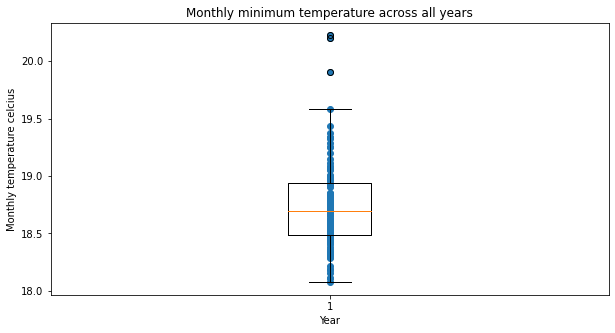

In [11]:
plt.figure(figsize=(10,5))
plt.boxplot(average_temp_year)

plt.scatter(x=np.ones(len(average_temp_year.columns)), y=average_temp_year.iloc[0])
plt.xlabel('Year')
plt.ylabel('Monthly temperature celcius')

plt.title('Monthly minimum temperature across all years')


In [12]:
temp_data_matrix = temp_data_matrix.transpose()

In [13]:
temp_data_matrix_np = temp_data_matrix.values
#coverted dataframe into numpy matrix so that it can be easly reshaped index and column name are not included in the matrix

shape = temp_data_matrix_np.shape
print("shape before reshaping :",shape)
temp_data_matrix_np = np.stack(np.ravel(temp_data_matrix_np))
temp_data_matrix_np = np.expand_dims(temp_data_matrix_np,axis=-1)
print("shape after reshaping :", temp_data_matrix_np.shape)


shape before reshaping : (102, 12)
shape after reshaping : (1224, 1)


Reshaped data are stacked year wise data

# Splitting the data in train and test set
## Train 1901-1981
## Test   1982-2002

In [14]:
temp_data = pd.DataFrame({'Temperature': temp_data_matrix_np[:,0]})
temp_data.set_index(dates, inplace=True)

#splitting the data into train and test set (80-20)

train_temp_data = temp_data.loc[: '1981']
train_time = train_temp_data.index
x_train = train_temp_data.values
test_temp_data = temp_data.loc['1982':]
test_time = test_temp_data.index
x_test = test_temp_data.values

print(train_temp_data.head())
print(train_temp_data.tail())
print(test_temp_data.head())
print(test_temp_data.tail())

            Temperature
1901-01-01       10.048
1901-02-01       12.167
1901-03-01       16.195
1901-04-01       20.599
1901-05-01       21.546
            Temperature
1981-08-01       24.105
1981-09-01       23.575
1981-10-01       20.904
1981-11-01       16.749
1981-12-01       13.016
            Temperature
1982-01-01       11.495
1982-02-01       13.496
1982-03-01       16.320
1982-04-01       19.402
1982-05-01       21.666
            Temperature
2002-08-01       24.149
2002-09-01       23.447
2002-10-01       21.279
2002-11-01       17.067
2002-12-01       13.000


In [15]:
print((x_train).shape)
print(train_time.shape)
print(x_test.shape)
print(test_time.shape)

(972, 1)
(972,)
(252, 1)
(252,)


# Visualization of temperature data 

In [16]:
train_temp_data.iplot(y='Temperature',mode='lines',title='Monthly minimum temperature across all years',xTitle='Year', yTitle='Monthly temperature celcius',color='blue')



# Zoomed in visualzation for first 5 years

In [17]:
train_temp_data.iloc[0:60].iplot(y='Temperature',mode='lines +markers+text',title='Monthly minimum temperature across all years',xTitle='Year', yTitle='Monthly temperature celcius',color='blue')




# LSTM Model

# Building a RNN model with LSTM variant

In [18]:
import tensorflow as tf

# Windowsize
## Number of lags on which new reading depends

In [19]:
def windowed_data(series,windowsize):
    x_train = []
    y_train =[]
    for i in range(len(series) - (windowsize)):
        x_train.append(series[i:i+windowsize,0])
        y_train.append(series[i+windowsize])
    return np.array(x_train), np.array(y_train)

## Preparing the data

In [36]:
windowsize=60
print(x_train.shape)
x,y = windowed_data(x_train,windowsize)
#x=np.expand_dims(x,axis=2)
print("shape of training set :",x.shape)
y=np.squeeze(y)
print("shape of output: ",y.shape)

(972, 1)
shape of training set : (912, 60)
shape of output:  (912,)


In [21]:
from tensorflow.keras import layers

In [22]:
from tensorflow.keras import models

# TensorBoard contains all the background information about the model

In [23]:
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

In [24]:
pwd

'C:\\Users\\arpit\\Desktop'

In [25]:
log_directory = 'logs\\fit'

In [26]:
board = TensorBoard(log_dir=log_directory,histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1)

# Building the model

In [42]:

model = models.Sequential()
#model.add(layers.Conv1D(filters=1, kernel_size=(5),activation='relu',input_shape=[windowsize,1] ,name='layer_1'))
model.add(layers.LSTM(windowsize,return_sequences=True,name='layer_2',input_shape=[1,windowsize]))
model.add(layers.LSTM(windowsize,return_sequences =False,name ='layer_3'))
model.add(layers.Dense(9,activation='relu',name ='layer_4'))
model.add(layers.Dense(4,activation='relu',name ='layer_5'))
model.add(layers.Dense(1,activation='relu',name ='layer_6'))
model.compile(optimizer='adam' , loss='mse',metrics=['mae'])

In [34]:
model.fit(x,y,batch_size=60,epochs=100,validation_split=0.2)

Train on 729 samples, validate on 183 samples
Epoch 1/100
729/729 [==============================] - 0s 481us/sample - loss: 0.7513 - mae: 0.6560 - val_loss: 0.9046 - val_mae: 0.7325
Epoch 2/100
729/729 [==============================] - 0s 278us/sample - loss: 0.7361 - mae: 0.6540 - val_loss: 0.7269 - val_mae: 0.6337
Epoch 3/100
729/729 [==============================] - 0s 274us/sample - loss: 0.6759 - mae: 0.6367 - val_loss: 0.6885 - val_mae: 0.6174
Epoch 4/100
729/729 [==============================] - 0s 272us/sample - loss: 0.6898 - mae: 0.6433 - val_loss: 0.6735 - val_mae: 0.6033
Epoch 5/100
729/729 [==============================] - 0s 274us/sample - loss: 0.6897 - mae: 0.6455 - val_loss: 0.6979 - val_mae: 0.6199
Epoch 6/100
729/729 [==============================] - 0s 273us/sample - loss: 0.6906 - mae: 0.6440 - val_loss: 0.7138 - val_mae: 0.6357
Epoch 7/100
729/729 [==============================] - 0s 270us/sample - loss: 0.6763 - mae: 0.6345 - val_loss: 0.6704 - val_mae: 0.

729/729 [==============================] - 0s 328us/sample - loss: 0.7021 - mae: 0.6498 - val_loss: 0.6480 - val_mae: 0.5934
Epoch 61/100
729/729 [==============================] - 0s 331us/sample - loss: 0.6639 - mae: 0.6271 - val_loss: 0.6965 - val_mae: 0.6239
Epoch 62/100
729/729 [==============================] - 0s 323us/sample - loss: 0.6823 - mae: 0.6368 - val_loss: 0.7433 - val_mae: 0.6490
Epoch 63/100
729/729 [==============================] - 0s 335us/sample - loss: 0.6991 - mae: 0.6363 - val_loss: 0.7350 - val_mae: 0.6464
Epoch 64/100
729/729 [==============================] - 0s 327us/sample - loss: 0.6984 - mae: 0.6443 - val_loss: 0.6692 - val_mae: 0.6073
Epoch 65/100
729/729 [==============================] - 0s 301us/sample - loss: 0.6584 - mae: 0.6244 - val_loss: 0.6517 - val_mae: 0.5965
Epoch 66/100
729/729 [==============================] - 0s 289us/sample - loss: 0.6614 - mae: 0.6290 - val_loss: 0.6539 - val_mae: 0.5976
Epoch 67/100
729/729 [=========================

In [ ]:
loss = pd.DataFrame(model.history.history)
loss.iplot(mode='lines+markers',size=5,xTitle="No of iteration",yTitle="Loss",title="Losses versus number of iteration")

In [41]:
xtest ,y_test =windowed_data(x_test,windowsize)
xtest=np.expand_dims(xtest,axis=1)
print(xtest.shape)
y_test=np.squeeze(y_test)
print(y_test.shape)

(192, 1, 60)
(192,)


In [42]:
pred =model.predict(xtest)
print(pred.shape)

(192, 1, 1)


In [43]:
pred=np.squeeze(pred)
print(pred.shape)

(192,)


In [43]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_2 (LSTM)               (None, 1, 60)             29040     
_________________________________________________________________
layer_3 (LSTM)               (None, 60)                29040     
_________________________________________________________________
layer_4 (Dense)              (None, 9)                 549       
_________________________________________________________________
layer_5 (Dense)              (None, 4)                 40        
_________________________________________________________________
layer_6 (Dense)              (None, 1)                 5         
Total params: 58,674
Trainable params: 58,674
Non-trainable params: 0
_________________________________________________________________


In [45]:
test_time

DatetimeIndex(['1982-01-01', '1982-02-01', '1982-03-01', '1982-04-01',
               '1982-05-01', '1982-06-01', '1982-07-01', '1982-08-01',
               '1982-09-01', '1982-10-01',
               ...
               '2002-03-01', '2002-04-01', '2002-05-01', '2002-06-01',
               '2002-07-01', '2002-08-01', '2002-09-01', '2002-10-01',
               '2002-11-01', '2002-12-01'],
              dtype='datetime64[ns]', length=252, freq='MS')

In [46]:
time = test_time[60:]
time

DatetimeIndex(['1987-01-01', '1987-02-01', '1987-03-01', '1987-04-01',
               '1987-05-01', '1987-06-01', '1987-07-01', '1987-08-01',
               '1987-09-01', '1987-10-01',
               ...
               '2002-03-01', '2002-04-01', '2002-05-01', '2002-06-01',
               '2002-07-01', '2002-08-01', '2002-09-01', '2002-10-01',
               '2002-11-01', '2002-12-01'],
              dtype='datetime64[ns]', length=192, freq='MS')

In [47]:
prediction = pd.DataFrame({'Time': time , "Predicted" : pred , "Actual" : y_test})

In [48]:
prediction.head()

,Time,Predicted,Actual
0,1987-01-01,11.507912,11.413
1,1987-02-01,12.375232,13.368
2,1987-03-01,16.756021,15.973
3,1987-04-01,20.146139,19.673
4,1987-05-01,21.515425,21.018


In [49]:
prediction.set_index('Time' , inplace =True)

In [50]:
prediction.head()

,Predicted,Actual
Time,,
1987-01-01,11.507912,11.413
1987-02-01,12.375232,13.368
1987-03-01,16.756021,15.973
1987-04-01,20.146139,19.673
1987-05-01,21.515425,21.018


In [51]:
prediction[['Predicted','Actual']].iplot(kind ='spread',xTitle="Time" ,yTitle="Temperature")

# Zoomedin Version

In [52]:
prediction[['Predicted','Actual']].iloc[0:60].iplot(kind ='spread',xTitle="Time" ,yTitle="Temperature",mode='lines +markers',size=5)

In [53]:
from sklearn.metrics import mean_squared_error 

In [54]:
output = model.predict(x)

In [55]:
mse = mean_squared_error(np.squeeze(output),y)

In [56]:
print("Mean squared error is :",mse)

Mean squared error is : 0.6024394961801033


# END